In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [92]:
import sys
sys.executable

'c:\\ProgramData\\anaconda3\\python.exe'

In [93]:

def histdist(dataframe, column):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    sns.distplot(dataframe[column])
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('distplot ' + column)

    plt.subplot(1, 2, 2)
    dataframe[column].hist(figsize=(15, 6))
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Histogram ' + column)

    plt.tight_layout()
    plt.show()


In [94]:

def stddf(dataframe, column, multiplier=3):
    print("Column Name:", column)

    u_b = dataframe[column].mean() + multiplier * dataframe[column].std()
    l_b = dataframe[column].mean() - multiplier * dataframe[column].std()
    print("Lower Boundary:", l_b)
    print("Upper Boundary:", u_b)

    lower_boundary = l_b
    upper_boundary = u_b

    outliers_below = dataframe[dataframe[column] < lower_boundary]
    outliers_above = dataframe[dataframe[column] > upper_boundary]

    num_outliers_below = len(outliers_below)
    num_outliers_above = len(outliers_above)

    print("Number of outliers below the lower boundary:", num_outliers_below)
    print("Number of outliers above the upper boundary:", num_outliers_above)

    dataframe.loc[dataframe[column] > u_b, column] = u_b
    dataframe.loc[dataframe[column] < l_b, column] = l_b


In [95]:


def skewcol(df, column_name):
    # Log Transform
    log_transformed = np.log(df[column_name])

    # Square Root Transform
    sqrt_transformed = np.sqrt(df[column_name])

    # Cube Root Transform
    cbrt_transformed = np.cbrt(df[column_name])

    # Calculate Skewness for each transformation
    original_skewness = df[column_name].skew()
    log_skewness = log_transformed.skew()
    sqrt_skewness = sqrt_transformed.skew()
    cbrt_skewness = cbrt_transformed.skew()

    # Display the skewness values
    print("Column name:- ",column_name)
    print("Original Data Skewness:", original_skewness)
    print("Log Transform Skewness:", log_skewness)
    print("Square Root Transform Skewness:", sqrt_skewness)
    print("Cube Root Transform Skewness:", cbrt_skewness)

In [96]:
df = pd.read_csv("./dataset/train_ctrUa4K.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [97]:
df.shape


(614, 13)

In [98]:

df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:

df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

----------------------------------
## Missing value treatment


In [100]:
# Female count is less so we will fill null values with Female
df.Gender = df.Gender.fillna("Female")

# "No" count is less so we will fill null values with "No"
df.Married = df.Married.fillna("No")

# "3+" count is less so we will fill null values with "3+"
df.Dependents = df.Dependents.fillna("3+")

# "Yes" count is less so we will fill null values with "Yes"
df.Self_Employed = df.Self_Employed.fillna("Yes")

# 12 count is less so we will fill null values with 12
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(12)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.median())

# 0.0 count is less so we will fill null values with 0.0
df.Credit_History = df.Credit_History.fillna(0.0)



In [101]:
df6=df["Loan_ID"]

df = df.drop(["Loan_ID"],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# DataType conversion (categorical to numerical)

- label encoder

In [102]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [104]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Gender', 'Education', 'Married', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [105]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

------------------------
# Class Imbalance

In [106]:
da1 = df.corr()
da1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.339026,0.141975,0.061497,-0.039440,0.013933,0.082316,0.063245,-0.053248,0.035780,-0.017054,0.025407
Married,0.339026,1.000000,0.307667,0.017671,-0.016628,0.050194,0.080496,0.145717,-0.081051,-0.023626,0.000395,0.084281
Dependents,0.141975,0.307667,1.000000,0.061179,0.030808,0.110073,0.016073,0.140926,-0.037612,-0.034355,0.025773,-0.003391
Education,0.061497,0.017671,0.061179,1.000000,-0.019059,-0.140760,-0.062290,-0.168759,-0.108617,-0.081637,-0.065243,-0.085884
Self_Employed,-0.039440,-0.016628,0.030808,-0.019059,1.000000,0.121356,0.028834,0.112103,-0.038786,-0.001923,-0.022732,0.005857
ApplicantIncome,0.013933,0.050194,0.110073,-0.140760,0.121356,1.000000,-0.116605,0.565181,-0.016562,0.006986,-0.009500,-0.004710
CoapplicantIncome,0.082316,0.080496,0.016073,-0.062290,0.028834,-0.116605,1.000000,0.189218,-0.050878,-0.058795,0.010522,-0.059187
LoanAmount,0.063245,0.145717,0.140926,-0.168759,0.112103,0.565181,0.189218,1.000000,0.063794,-0.034473,-0.046632,-0.033214
Loan_Amount_Term,-0.053248,-0.081051,-0.037612,-0.108617,-0.038786,-0.016562,-0.050878,0.063794,1.000000,0.049195,-0.082497,0.006561
Credit_History,0.035780,-0.023626,-0.034355,-0.081637,-0.001923,0.006986,-0.058795,-0.034473,0.049195,1.000000,-0.018761,0.432616


In [107]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


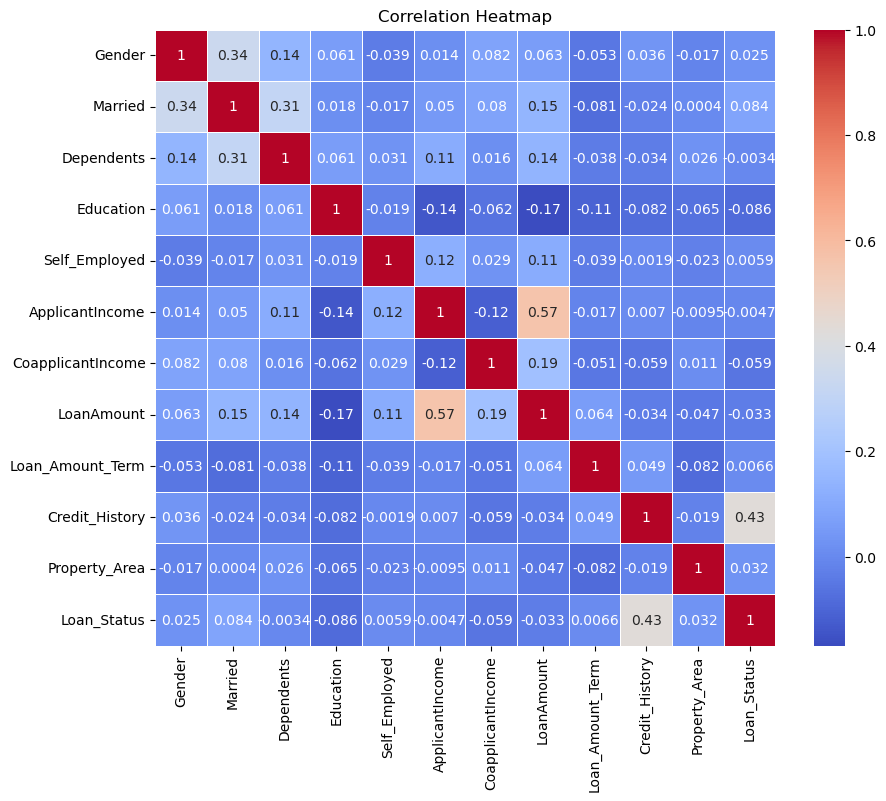

In [108]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

-------------------------------
## Outlier treatment

In [109]:

def iqrdf(dataframe, column, iqr_multiplier=3):
    IQR = dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)
    print("IQR -", IQR)

    l_b = dataframe[column].quantile(0.25) - (IQR * iqr_multiplier)
    u_b = dataframe[column].quantile(0.75) + (IQR * iqr_multiplier)
    print("Lower Boundary: ", l_b)
    print("Upper Boundary: ", u_b)

    lower_boundary = l_b
    upper_boundary = u_b

    outliers_below = dataframe[dataframe[column] < lower_boundary]
    outliers_above = dataframe[dataframe[column] > upper_boundary]

    num_outliers_below = len(outliers_below)
    num_outliers_above = len(outliers_above)

    print("Number of outliers below the lower boundary:", num_outliers_below)
    print("Number of outliers above the upper boundary:", num_outliers_above)

    dataframe.loc[dataframe[column] > u_b, column] = u_b
    dataframe.loc[dataframe[column] < l_b, column] = l_b


<function matplotlib.pyplot.show(close=None, block=None)>

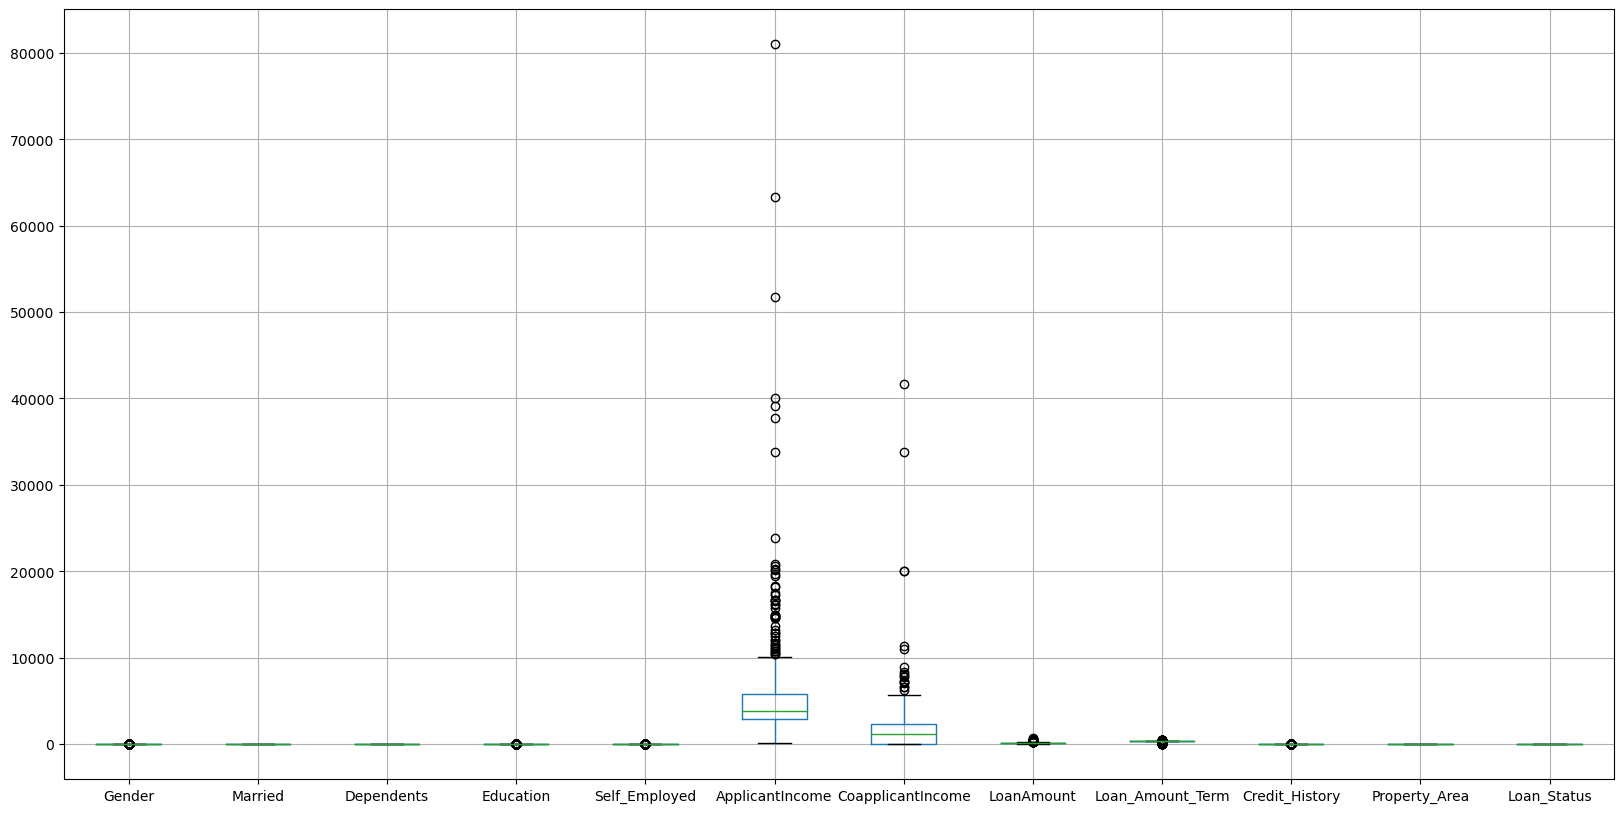

In [110]:
df.boxplot(figsize=(20,10))
plt.show

---------------------------
### ApplicantIncome column

<Axes: >

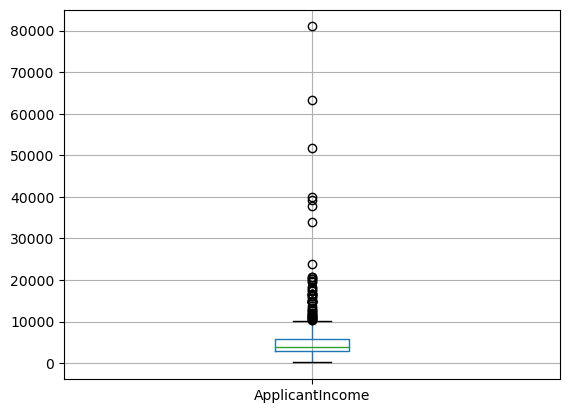

In [111]:
df.boxplot(column="ApplicantIncome")

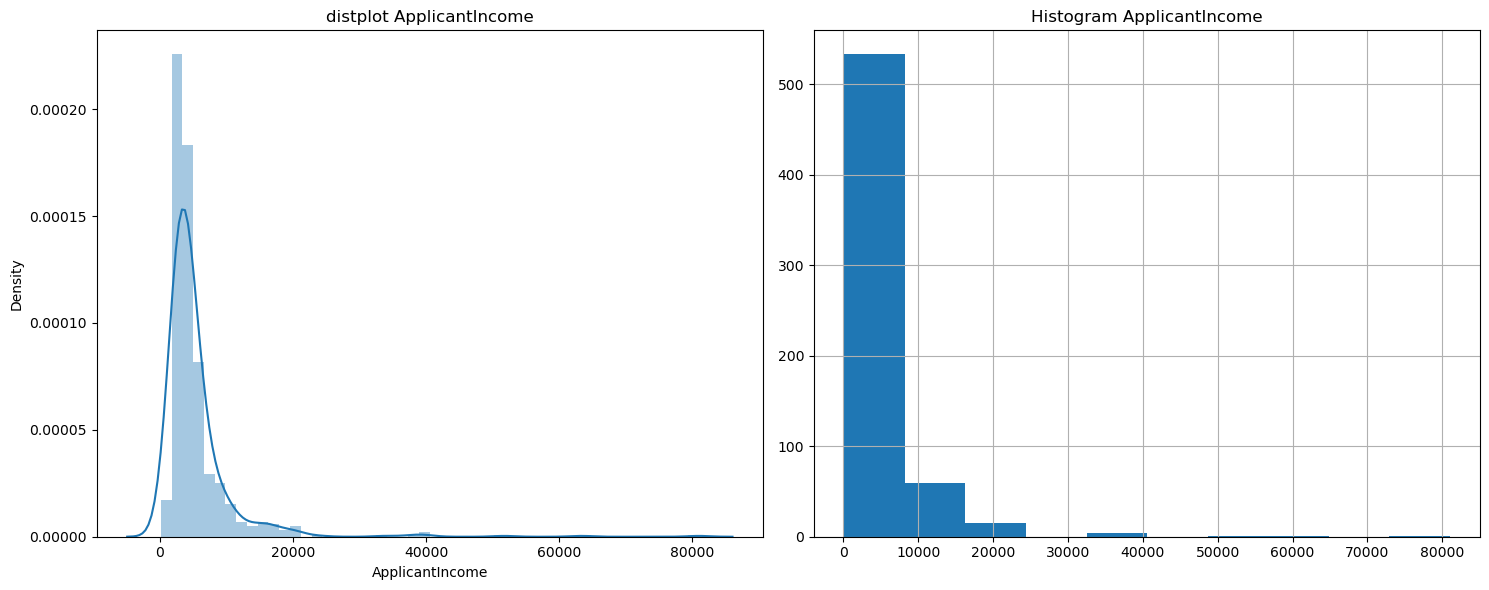

In [112]:
histdist(df,'ApplicantIncome')

In [113]:
iqrdf(df,'ApplicantIncome',iqr_multiplier=3)

IQR - 2917.5
Lower Boundary:  -5875.0
Upper Boundary:  14547.5
Number of outliers below the lower boundary: 0
Number of outliers above the upper boundary: 32


---------------------------
### LoanAmount column

<Axes: >

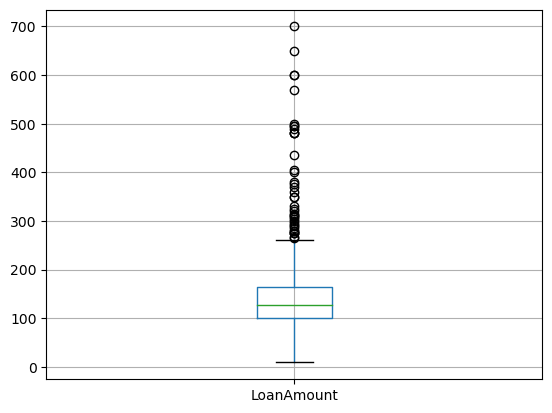

In [114]:
df.boxplot(column="LoanAmount")

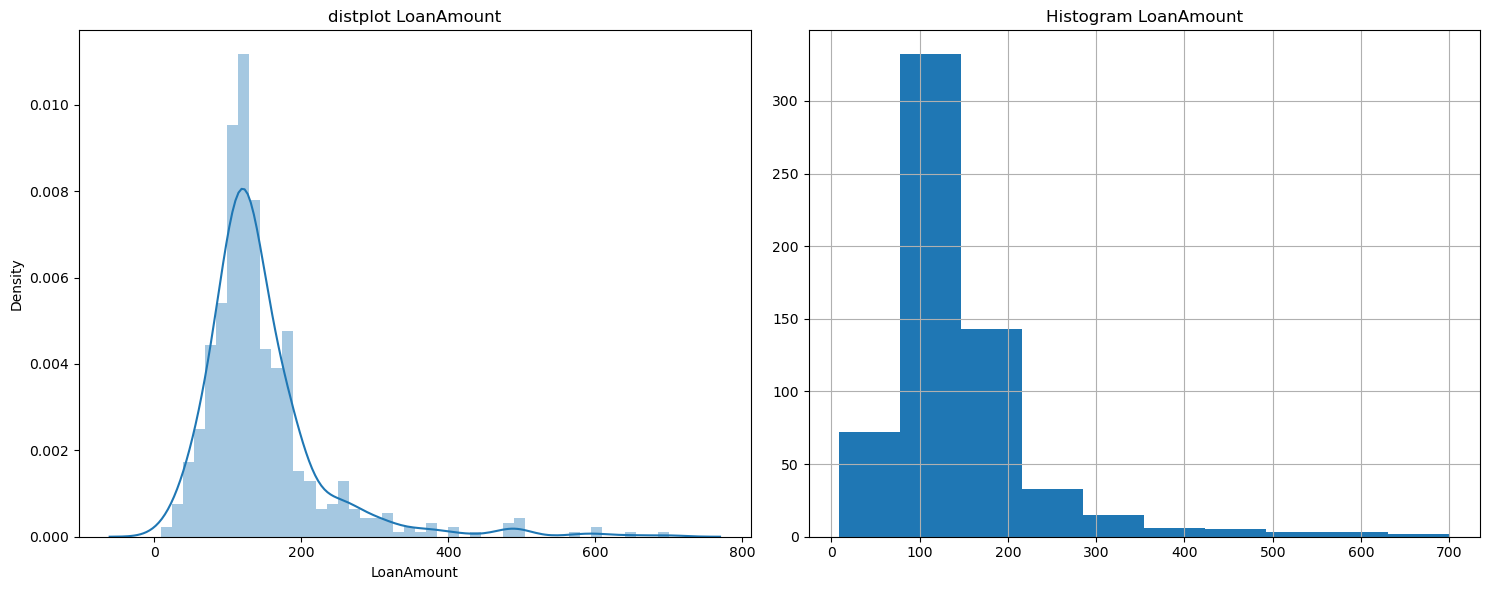

In [115]:
histdist(df,'LoanAmount')

In [116]:
iqrdf(df,'LoanAmount',iqr_multiplier=3)

IQR - 64.5
Lower Boundary:  -93.25
Upper Boundary:  358.25
Number of outliers below the lower boundary: 0
Number of outliers above the upper boundary: 19


---------------------------
### CoapplicantIncome column

<Axes: >

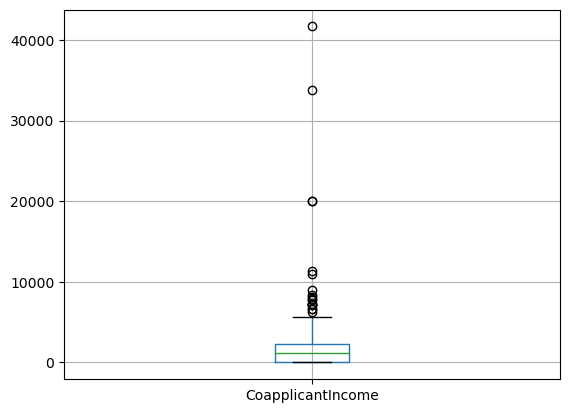

In [117]:
df.boxplot(column="CoapplicantIncome")

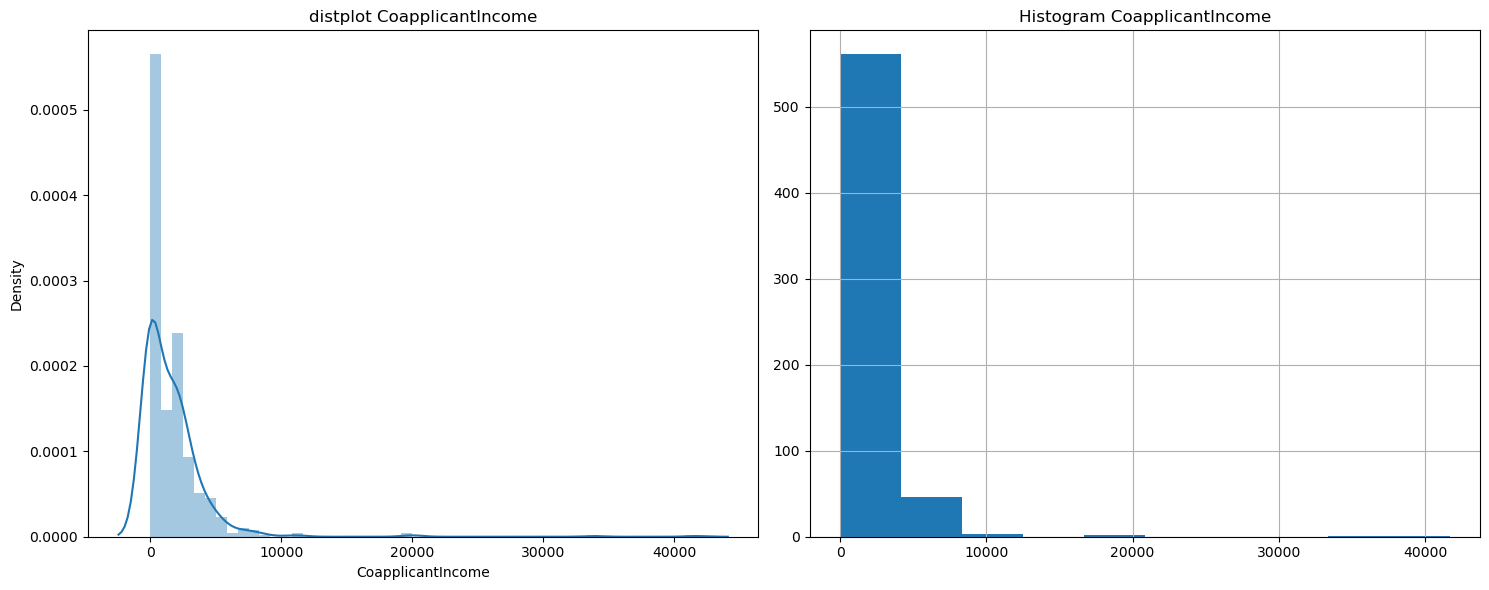

In [118]:
histdist(df,'CoapplicantIncome')

In [119]:
iqrdf(df,'CoapplicantIncome',iqr_multiplier=3)

IQR - 2297.25
Lower Boundary:  -6891.75
Upper Boundary:  9189.0
Number of outliers below the lower boundary: 0
Number of outliers above the upper boundary: 6


In [120]:
df["CoapplicantIncome"] = np.cbrt(df["CoapplicantIncome"])
df["LoanAmount"] = np.cbrt(df["LoanAmount"])

---------------------------
# splitting the data in to X & Y 

In [121]:
#splitting the data in to X & Y 
x=df.iloc[:,0:11]#[:,:-1]
x.head(2)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,0.000000,5.039684,360.0,1.0,2
1,1,1,1,0,0,4583.0,11.467457,5.039684,360.0,1.0,0


In [122]:
y=df.iloc[:,11]#[:,-1]
y.head(2)

0    1
1    0
Name: Loan_Status, dtype: int32

In [123]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((491, 11), (123, 11), (491,), (123,))

In [124]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(xtrain, ytrain)


LogisticRegression()

In [125]:
lg_p = lg.predict(xtest)


In [126]:
lg_prob = lg.predict_proba(xtest)


In [127]:
from sklearn.metrics import confusion_matrix
lg_cf = confusion_matrix(ytest, lg_p)
lg_cf

array([[23, 22],
       [10, 68]], dtype=int64)

In [128]:
# Calculate accuracy
log_acc = (lg_cf.diagonal().sum() / lg_cf.sum()) * 100

In [129]:

from sklearn.metrics import classification_report
print(classification_report(ytest, lg_p))


              precision    recall  f1-score   support

           0       0.70      0.51      0.59        45
           1       0.76      0.87      0.81        78

    accuracy                           0.74       123
   macro avg       0.73      0.69      0.70       123
weighted avg       0.73      0.74      0.73       123



In [130]:

df1=pd.DataFrame(lg_prob)
df1


,0,1
0,0.161582,0.838418
1,0.152013,0.847987
2,0.152405,0.847595
3,0.705163,0.294837
4,0.249173,0.750827
...,...,...
118,0.163438,0.836562
119,0.171859,0.828141
120,0.140762,0.859238
121,0.231075,0.768925


In [131]:

#AUC-ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc=roc_auc_score(ytest,lg_prob[:, 1])
roc


0.7535612535612536

In [132]:
fpr,tpr,threshold=roc_curve(ytest,lg_prob[:,1])

#plt.plot(fpr,tpr)

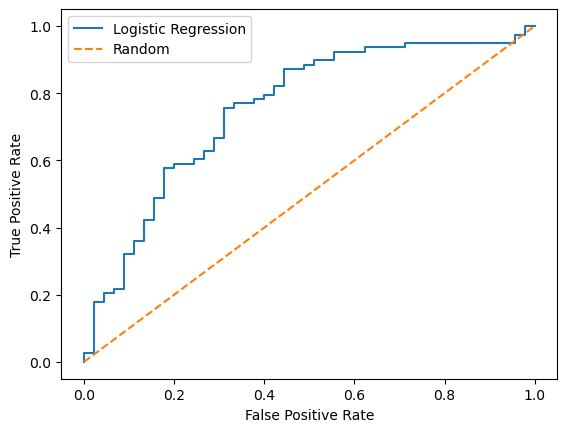

In [133]:
# Plot the ROC curve with labels and legend
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

-----------------------------------
### Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(xtrain, ytrain)

rf_p = rf.predict(xtest)

print("=" * 50)

rf.feature_importances_

print("=" * 50)

rf_cf = confusion_matrix(rf_p, ytest)
print("Confusion matrix of random forest is :-\n", rf_cf)

print("=" * 50)

rf_acc = rf_cf.diagonal().sum() / rf_cf.sum() * 100
print("Accuracy of random forest is :-", rf_acc)

print("=" * 50)

from sklearn.metrics import classification_report

print(classification_report(rf_p, ytest))


Confusion matrix of random forest is :-
 [[22  7]
 [23 71]]
Accuracy of random forest is :- 75.60975609756098
              precision    recall  f1-score   support

           0       0.49      0.76      0.59        29
           1       0.91      0.76      0.83        94

    accuracy                           0.76       123
   macro avg       0.70      0.76      0.71       123
weighted avg       0.81      0.76      0.77       123



---------------------------
### Decision tree

In [140]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(xtrain,ytrain)

dt_p = dt.predict(xtest)
#print("Predictions of decision tree are :-",dt_p)
print("-" * 50)

dt.feature_importances_
print("-" * 50)
dt_cf = confusion_matrix(dt_p,ytest)
print("Confusion matrix of decision tree is :-\n", dt_cf)

print("-" * 50)

dt_acc = dt_cf.diagonal().sum()/dt_cf.sum()*100
print("Accuracy of decision tree is :-",dt_acc)

print("-" * 50)

from sklearn.metrics import classification_report

print(classification_report(dt_p,ytest))

--------------------------------------------------
--------------------------------------------------
Confusion matrix of decision tree is :-
 [[20 22]
 [25 56]]
--------------------------------------------------
Accuracy of decision tree is :- 61.78861788617886
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.48      0.46        42
           1       0.72      0.69      0.70        81

    accuracy                           0.62       123
   macro avg       0.58      0.58      0.58       123
weighted avg       0.62      0.62      0.62       123



--------------------------
### KNN

In [142]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(xtrain, ytrain)

knn_p = knn.predict(xtest)

print("=" * 50)

knn_cf = confusion_matrix(knn_p, ytest)
print("Confusion matrix of KNeighborsClassifier is :-\n", knn_cf)

print("=" * 50)

knn_acc = knn_cf.diagonal().sum() / knn_cf.sum() * 100
print("Accuracy of KNeighborsClassifier is :-", knn_acc)

print("=" * 50)

print(classification_report(knn_p, ytest))


Confusion matrix of KNeighborsClassifier is :-
 [[ 5 11]
 [40 67]]
Accuracy of KNeighborsClassifier is :- 58.536585365853654
              precision    recall  f1-score   support

           0       0.11      0.31      0.16        16
           1       0.86      0.63      0.72       107

    accuracy                           0.59       123
   macro avg       0.49      0.47      0.44       123
weighted avg       0.76      0.59      0.65       123

